Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 13s 216us/step - loss: 0.2434 - acc: 0.9245 - val_loss: 0.1056 - val_acc: 0.9683
Epoch 2/50
60000/60000 [==============================] - 14s 228us/step - loss: 0.1028 - acc: 0.9692 - val_loss: 0.0753 - val_acc: 0.9773
Epoch 3/50
60000/60000 [==============================] - 15s 250us/step - loss: 0.0761 - acc: 0.9771 - val_loss: 0.0807 - val_acc: 0.9779
Epoch 4/50
60000/60000 [==============================] - 15s 251us/step - loss: 0.0593 - acc: 0.9814 - val_loss: 0.0913 - val_acc: 0.9754
Epoch 5/50
60000/60000 [==============================] - 15s 251us/step - loss: 0.0506 - acc: 0.9849 - val_loss: 0.0827 - val_acc: 0.9784
Epoch 6/50
60000/60000 [==============================] - 15s 255us/step - loss: 0.0440 - acc: 0.9869 - val_loss: 0.0726 - val_acc: 0.9814
Epoch 7/50
60000/60000 [==============================] - 15s 251us/

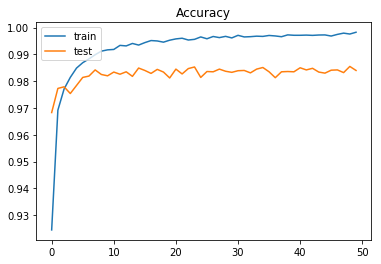

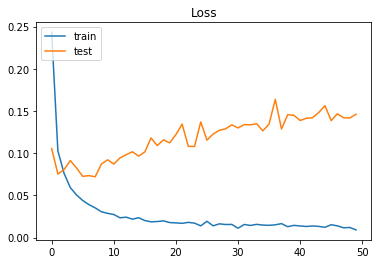

In [5]:
# MLPでMNISTの分類問題を実装
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_size = 28 * 28 # 画素数
out_size = 10 # 1 ～ 10

# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを 28*28=784 に一時配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
# ラベルデータを one-hot ベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# MLPモデル構造を定義
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train,
                batch_size=128,
                epochs=50,
                verbose=1,
                validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフで描画
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
# ニューラルネットワークをセーブ
model.save("model_mlp.h5") # HDF5ファイル